In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve, f1_score, balanced_accuracy_score, accuracy_score
from  sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import nltk

In [2]:
def return_no_words(x):
    x = nltk.tokenize.word_tokenize(x)
    return len(x)

In [3]:
def report_results(results_path):
    results = pd.read_csv(results_path)
    # 1 prediction distribution of aggression
    # 0 negative prediction distribution of aggression
    plt.hist([results["y_predict_prob_1"],results["y_predict_prob_0"]])
    plt.ylim(0, 1000)
    plt.xlim(0,1,0.1)

    # predict.prob scores
    fpr, tpr, thrshold = roc_curve(results["y_true_bool"], results["y_predict_prob_1"])
    roc_auc = auc(results["y_true_bool"], results["y_predict_prob_1"])
    print("AUC score", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # predict scores
    fpr, tpr, thrshold = roc_curve(results["y_true_binary"], results["y_prediction"])
    roc_auc = auc(results["y_true_binary"], results["y_prediction"])
    print("AUC score", roc_auc)
    # Confusion Matrix
    tn, fp, fn, tp = cm(y_true=results["y_true_binary"], y_pred=results["y_prediction"]).ravel()
    print("CM", tn, fp, fn, tp)
    F1_score = f1_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("F1-score", F1_score)
    #imbalanced accuracy score - NOT TO Trust
    imbalanced_accuracy_score = accuracy_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("imbalanced_accuracy_score", imbalanced_accuracy_score)

In [4]:
def dataset_features_analysis(data, no_features_to_return=10):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.pipeline import Pipeline
    pipe = Pipeline([('count',  CountVectorizer(ngram_range=(1,2), analyzer='word', max_features=10000)),
                         ('tfid',TfidfTransformer(norm='l2', sublinear_tf=True))]).fit(data)
    data_features = pipe.transform(data)
    print("Features mean", data_features.mean())
    sum_words = data_features.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in pipe['count'].vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    print("Most occuring features", words_freq[:no_features_to_return])
    return words_freq

 # Youtube linear word oh

AUC score 0.6909133353523118


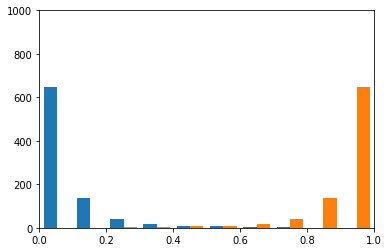

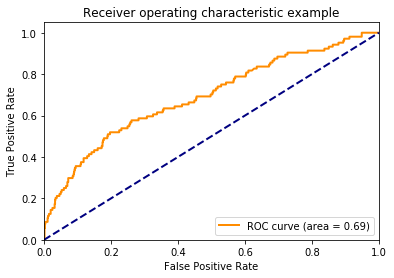

AUC score 0.5406445588532203
CM 758 4 95 9
F1-score 0.15384615384615383
imbalanced_accuracy_score 0.8856812933025404


In [5]:
 report_results("linear_word_oh_YouTube_prediction_results.csv")

# Youtube linear char oh

AUC score 0.6771010684648694


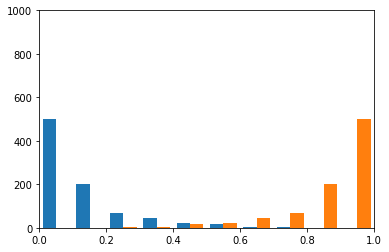

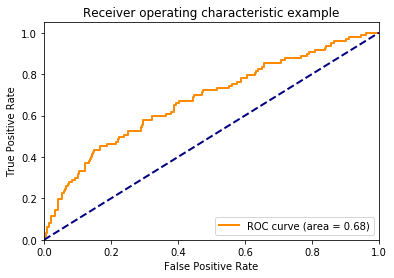

AUC score 0.5366388266995563
CM 754 15 88 9
F1-score 0.1487603305785124
imbalanced_accuracy_score 0.8810623556581986


In [6]:
 report_results("linear_char_oh_YouTube_prediction_results.csv")

# Youtube mlp word oh

AUC score 0.492148554336989


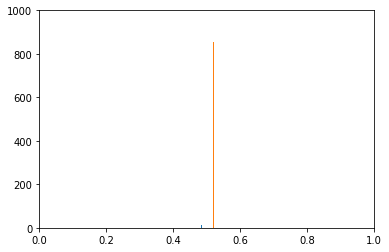

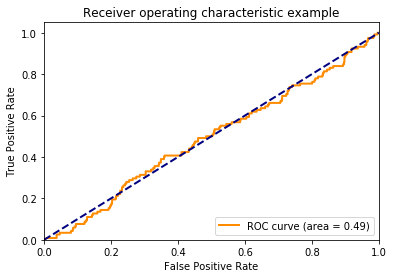

AUC score 0.5
CM 748 0 118 0
F1-score 0.0
imbalanced_accuracy_score 0.8637413394919169


In [7]:
  report_results("mlp_word_oh_YouTube_prediction_results.csv")

# Youtube mlp char oh

AUC score 0.40304736875039104


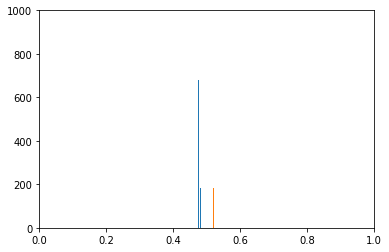

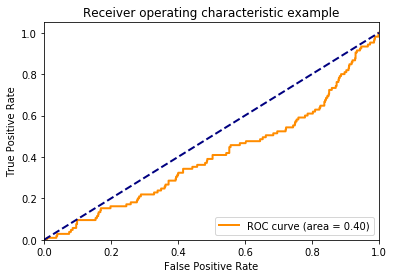

AUC score 0.5
CM 761 0 105 0
F1-score 0.0
imbalanced_accuracy_score 0.8787528868360277


In [8]:
 report_results("mlp_char_oh_YouTube_prediction_results.csv")

# lstm youtube  word

AUC score 0.6332399555824751


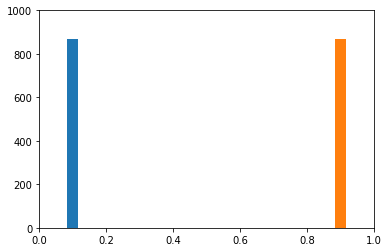

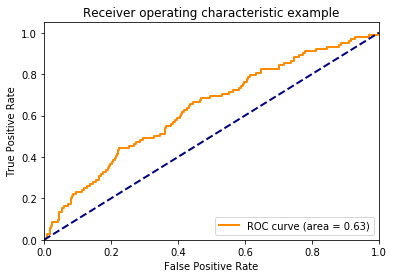

AUC score 0.5
CM 762 0 104 0
F1-score 0.0
imbalanced_accuracy_score 0.8799076212471132


In [14]:
 report_results("lstm_word_oh_YouTube_prediction_results.csv")

# lstm youtube char

AUC score 0.5495953002610966


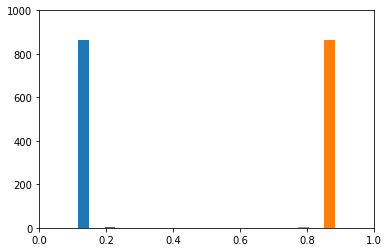

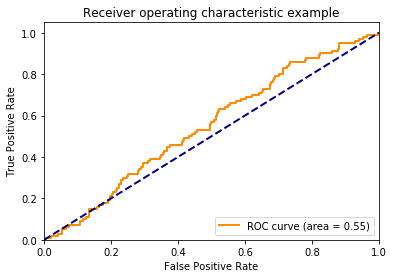

AUC score 0.5
CM 766 0 100 0
F1-score 0.0
imbalanced_accuracy_score 0.8845265588914549


In [15]:
 report_results("lstm_char_oh_YouTube_prediction_results.csv")

# conv_lstm youtube word

AUC score 0.6289492052203917


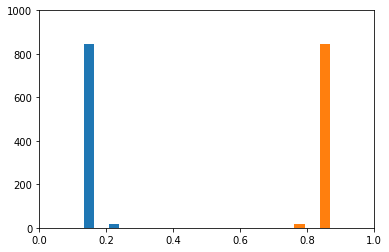

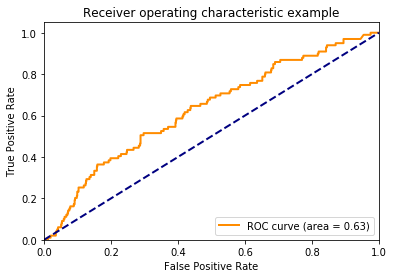

AUC score 0.5
CM 767 0 99 0
F1-score 0.0
imbalanced_accuracy_score 0.8856812933025404


In [16]:
 report_results("conv_lstm_word_oh_YouTube_prediction_results.csv")

# conv_lstm youtube char

AUC score 0.623113410952997


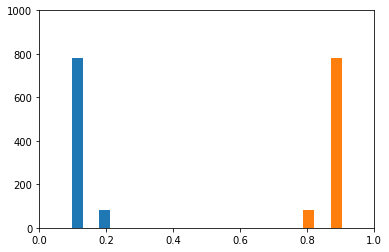

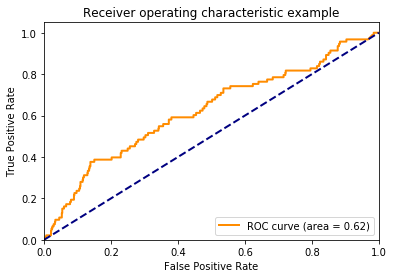

AUC score 0.5
CM 773 0 93 0
F1-score 0.0
imbalanced_accuracy_score 0.8926096997690531


In [17]:
 report_results("conv_lstm_char_oh_YouTube_prediction_results.csv")

In [9]:
youtube_data = pd.read_csv("../YouTube_parsed_dataset.csv")

In [10]:
youtube_data = youtube_data.dropna()

In [11]:
len(youtube_data)

3464

In [12]:
len(youtube_data[youtube_data["oh_label"] == 1])

417

In [13]:
len(youtube_data[youtube_data["oh_label"] == 0])

3047

In [36]:
len(youtube_data[youtube_data["oh_label"] == 1])/len(youtube_data)

0.1203810623556582

In [10]:
#avergae number of words per post
youtube_data["No words"] = youtube_data["Text"].apply(lambda x : return_no_words(x))

In [11]:
np.mean(youtube_data["No words"] )

237.90531177829098

In [12]:
np.std(youtube_data["No words"] )

249.1024992285314

In [13]:
np.var(youtube_data["No words"] )

62052.05512190049

(0, 2000)

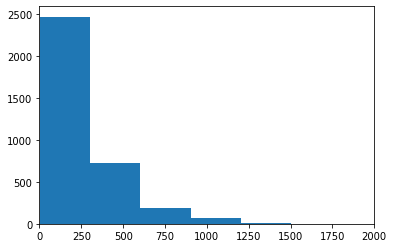

In [29]:
plt.hist(youtube_data["No words"])
plt.xlim(0,2000)

(0, 1000)

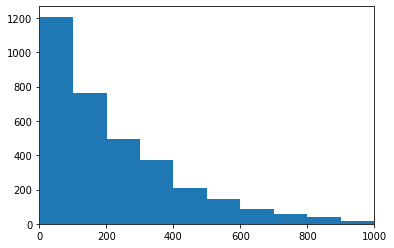

In [27]:
plt.hist(youtube_data[(youtube_data["No words"] >=0 ) & (youtube_data["No words"] <=1000)]["No words"])
plt.xlim(0,1000)

(0, 300)

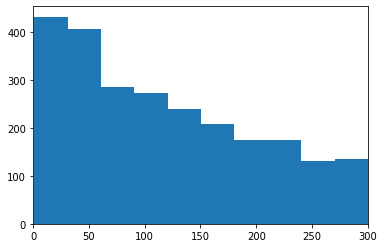

In [28]:
plt.hist(youtube_data[(youtube_data["No words"] >=0 ) & (youtube_data["No words"] <=300)]["No words"])
plt.xlim(0,300)

In [31]:
df_youtube = dataset_features_analysis(youtube_data["Text"],1000)
words = []
numbers = []
for i in df_youtube:
    words.append(i[0])
    numbers.append(i[1])
pd.DataFrame({"youtube_features": words, "youtube_featurs_No": numbers}).to_csv("youtube_features.csv")

Features mean 0.0010330558385455357
Most occuring features [('the', 148.02707436014904), ('you', 132.99953602102426), ('to', 119.65187749785095), ('is', 119.53409018531947), ('and', 116.30012842927967), ('this', 112.32750123454683), ('it', 112.27202470969476), ('that', 99.48687318184507), ('of', 93.26953098762786), ('in', 88.4846783798466), ('like', 85.4940884030392), ('so', 84.89958632520049), ('my', 84.29639706709374), ('was', 76.59515938122553), ('on', 76.21704302076164), ('love', 75.9072349164937), ('your', 75.75442047199512), ('me', 75.74786711540588), ('for', 75.08126850957578), ('are', 74.57020082401272), ('he', 72.45880666792208), ('just', 70.88582478405696), ('but', 69.56674037479586), ('have', 69.51844256756611), ('not', 66.80365074691684), ('they', 64.64759229597462), ('what', 64.59749472880569), ('lol', 64.1634616617479), ('be', 63.78250222586484), ('with', 61.46376122904212), ('do', 61.327326748756406), ('song', 60.84721242264171), ('if', 60.236802002437884), ('can', 60.10